In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dtype = np.dtype('float32')
path = "../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar1/L197621_SAP0_BEAM1_DM12.44_mask.dat"
with open( path, 'rb') as f:
    pulsar_data = np.fromfile(f, dtype)
pulsar_data

array([1354649.2, 1379855.1, 1374663.1, ..., 1479622.2, 1479622.2,
       1479622.2], dtype=float32)

In [8]:
dt = 0.00262143998406827
nbins = 69120 
total_time = nbins * dt
time = [t*dt for t in np.arange(0, nbins)]

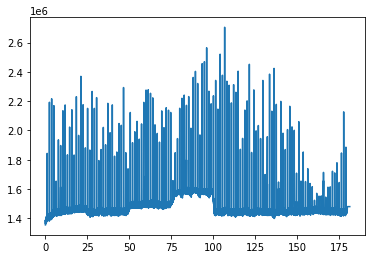

In [9]:
plt.plot(time, pulsar_data)

In [10]:
%matplotlib inline

(0.0, 209.80255598842447)

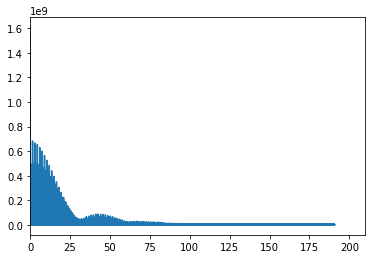

In [11]:
frequencies  = np.fft.fftfreq(69120, 0.00262143998406827)
transform = np.fft.fft(pulsar_data)
plt.plot(frequencies[1:], abs(transform[1:]))
plt.xlim(0)

following calculation does what we can do with fftfreq.

In [14]:
dtime = 0.00262143998406827
nbins = len(pulsar_data)
total_time = dtime * nbins
total_time

181.19393169879882

In [ ]:
dnu = 1 / total_time
dnu

In [ ]:
from scipy.signal import find_peaks
peaks_index, properties = find_peaks(np.abs(transform), height=0.4* 10 **9)

In [ ]:
peaks_index
peak_frequencies = [frequencies[i] for i in peaks_index]
print(peak_frequencies)
print(len(peak_frequencies))

In [70]:
period = 0.7450580642204528 ** -1 *2 

## stacking

In [75]:

period_in_index = int(period // dtime)

d = dict()
i = 0
while i < int(nbins):
    d[f"stack{i/period_in_index}"] = np.array( pulsar_data[i:i+period_in_index])
    i += period_in_index

In [81]:
stack = np.zeros(period_in_index)
for x in d.values():
    if len(x) == 512:
        pass
    else:
        stack += x 



In [82]:
68608+512
time2 = [dt*t for t in range(len(stack))]

Text(0.5, 1.0, 'graph of an addition of signals of the first radio pulsar ever found.')

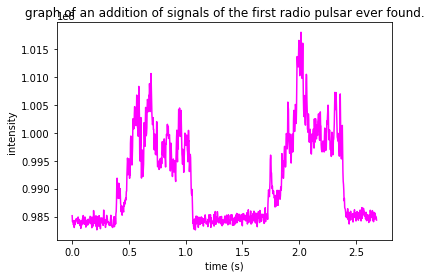

In [83]:
plt.plot(time2,stack, color='magenta')
plt.xlabel('time (s)')
plt.ylabel('intensity')
plt.title('graph of an addition of signals of the first radio pulsar ever found.')

